In [222]:
#import the data
from keras.datasets import cifar10
import numpy

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(numpy.max(y_train) - numpy.min(y_train) + 1))

shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


In [223]:
#Define one-hot encoding function

def to_one_hot(y, num_class=10):
    one_hot_encode = []
    for c in y:
        arr = numpy.zeros(num_class)
        arr [c] = 1
        one_hot_encode.append(arr)
    one_hot_encode = numpy.reshape(one_hot_encode,(len(y), num_class))
    return one_hot_encode

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [224]:
#Randomly partition the training set into training and validation sets
rand_indices = numpy.random.permutation(50000)
train_indices = rand_indices[0:40000]
valid_indices = rand_indices[40000:50000]

x_val = x_train[valid_indices, :]
y_val = y_train_vec[valid_indices, :]

x_tr = x_train[train_indices, :]
y_tr = y_train_vec[train_indices, :]

print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


In [226]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation ('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation ('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation ('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_88 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_117 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
activation_88 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_88 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_118 (Bat (None, 16, 16, 64)        256       
_________________________________________________________________
activation_89 (Activation)   (None, 16, 16, 64)      

In [227]:
from keras import optimizers

learning_rate = 1E-3 # to be tuned!

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=learning_rate, momentum=0.9),
              metrics=['acc'])

In [228]:
history = model.fit(x_tr, y_tr, batch_size=32, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
1250/1250 [==============================] - 7s 5ms/step - loss: 1.8709 - acc: 0.3654 - val_loss: 1.2774 - val_acc: 0.5489
Epoch 2/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2396 - acc: 0.5545 - val_loss: 1.1369 - val_acc: 0.6035
Epoch 3/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0640 - acc: 0.6210 - val_loss: 0.9648 - val_acc: 0.6636
Epoch 4/30
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9620 - acc: 0.6579 - val_loss: 1.1476 - val_acc: 0.5984
Epoch 5/30
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9039 - acc: 0.6787 - val_loss: 0.9304 - val_acc: 0.6725
Epoch 6/30
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8524 - acc: 0.6954 - val_loss: 0.8705 - val_acc: 0.6915
Epoch 7/30
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7966 - acc: 0.7161 - val_loss: 1.0652 - val_acc: 0.6407
Epoch 8/30
1250/1250 [==============================] - 6s 4ms

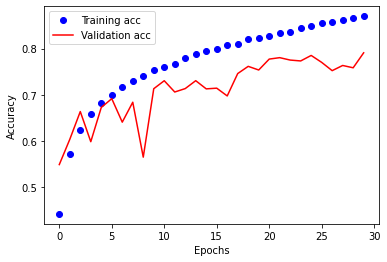

In [229]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [230]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation ('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation ('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation ('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_91 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_121 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
activation_91 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_122 (Bat (None, 16, 16, 64)        256       
_________________________________________________________________
activation_92 (Activation)   (None, 16, 16, 64)      

In [231]:
from keras import optimizers

learning_rate = 1E-3 # to be tuned!

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=learning_rate, momentum=0.9),
              metrics=['acc'])

In [233]:
history1 = model.fit(x_train, y_train_vec, batch_size=32, epochs=30)

Epoch 1/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1688 - acc: 0.5840
Epoch 2/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0037 - acc: 0.6435
Epoch 3/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9134 - acc: 0.6769
Epoch 4/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8518 - acc: 0.7001
Epoch 5/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8008 - acc: 0.7179
Epoch 6/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7542 - acc: 0.7350
Epoch 7/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7234 - acc: 0.7441
Epoch 8/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6886 - acc: 0.7572
Epoch 9/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6623 - acc: 0.7667
Epoch 10/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6332 - acc: 0.7762
Epoch 11/30
1563/1563 [======

In [234]:
loss_and_acc = model.evaluate(x_test, y_test_vec)
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.7511 - acc: 0.7640
loss = 0.751061201095581
accuracy = 0.7639999985694885
